# Imports

In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import reverse_geocoder as rg
import scipy.cluster.hierarchy as sch


import warnings
warnings.filterwarnings("ignore")  # Suppress all warnings

from my_functions import *  #feature_engineering_info, feature_engineering_basket, all_purchased_items
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [132]:
basket_df = pd.read_csv('customer_basket.csv')
info_df = pd.read_csv('customer_info.csv')

# Exploratory Data Analysis

In [133]:
basket_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 3 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   invoice_id     100000 non-null  int64 
 1   list_of_goods  100000 non-null  object
 2   customer_id    100000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 2.3+ MB


In [134]:
basket_df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
invoice_id,100000.0,NaN,NaN,NaN,6124713.66375,3533207.950417,20054.0,3066431.5,6118618.0,9195346.75,12242220.0
list_of_goods,100000,98742,['oil'],33,NaN,NaN,NaN,NaN,NaN,NaN,NaN
customer_id,100000.0,NaN,NaN,NaN,16945.56902,9837.987201,1.0,8425.0,16917.0,25536.0,34060.0


In [135]:
basket_df.head()

,invoice_id,list_of_goods,customer_id
0,5062209,"['megaman zero 3', 'energy bar', 'pokemon viol...",4925
1,4272512,"['black beer', 'bramble', 'laptop', 'pokemon v...",19046
2,7121052,"['soup', 'shallot', 'cake', 'fresh bread', 'cr...",10318
3,5847748,"['soup', 'cooking oil', 'cereals', 'oil', 'dog...",27283
4,6336114,"['eggplant', 'mint green tea', 'oil', 'bacon',...",16072


In [136]:
info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34060 entries, 0 to 34059
Data columns (total 26 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Unnamed: 0                               34060 non-null  int64  
 1   customer_id                              34060 non-null  int64  
 2   customer_name                            34060 non-null  object 
 3   customer_gender                          34060 non-null  object 
 4   customer_birthdate                       33719 non-null  object 
 5   kids_home                                33311 non-null  float64
 6   teens_home                               33277 non-null  float64
 7   number_complaints                        33038 non-null  float64
 8   distinct_stores_visited                  33379 non-null  float64
 9   lifetime_spend_groceries                 34060 non-null  float64
 10  lifetime_spend_electronics               34060

In [137]:
info_df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unnamed: 0,34060.0,NaN,NaN,NaN,17029.5,9832.419421,0.0,8514.75,17029.5,25544.25,34059.0
customer_id,34060.0,NaN,NaN,NaN,20010.854433,11557.889072,1.0,10018.75,19985.5,30042.25,40000.0
customer_name,34060,33579,Robert Brown,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
customer_gender,34060,2,male,17133,NaN,NaN,NaN,NaN,NaN,NaN,NaN
customer_birthdate,33719,33710,02/04/1989 04:33 PM,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
kids_home,33311.0,NaN,NaN,NaN,1.170244,1.307319,0.0,0.0,1.0,1.0,10.0
teens_home,33277.0,NaN,NaN,NaN,0.936292,0.759579,0.0,0.0,1.0,1.0,4.0
number_complaints,33038.0,NaN,NaN,NaN,0.832042,0.771205,0.0,0.0,1.0,1.0,4.0
distinct_stores_visited,33379.0,NaN,NaN,NaN,2.914078,1.549081,1.0,2.0,3.0,4.0,10.0
lifetime_spend_groceries,34060.0,NaN,NaN,NaN,22818.404698,20098.763199,0.0,9346.0,15877.5,30428.25,158544.0


In [138]:
# Percentage of missing values in each column
for col in info_df.columns:
    pct_missing = np.mean(info_df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Unnamed: 0 - 0%
customer_id - 0%
customer_name - 0%
customer_gender - 0%
customer_birthdate - 1%
kids_home - 2%
teens_home - 2%
number_complaints - 3%
distinct_stores_visited - 2%
lifetime_spend_groceries - 0%
lifetime_spend_electronics - 0%
typical_hour - 4%
lifetime_spend_vegetables - 3%
lifetime_spend_nonalcohol_drinks - 0%
lifetime_spend_alcohol_drinks - 2%
lifetime_spend_meat - 0%
lifetime_spend_fish - 5%
lifetime_spend_hygiene - 0%
lifetime_spend_videogames - 0%
lifetime_spend_petfood - 0%
lifetime_total_distinct_products - 0%
percentage_of_products_bought_promotion - 0%
year_first_transaction - 0%
loyalty_card_number - 32%
latitude - 0%
longitude - 0%


In [139]:
# Percentage of missing values in each column
for col in basket_df.columns:
    pct_missing = np.mean(basket_df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

invoice_id - 0%
list_of_goods - 0%
customer_id - 0%


# Preprocessing

In [140]:
# Get all new features for info_df
feature_engineering_info(info_df)

In [141]:
# Get all new features for basket_df
feature_engineering_basket(basket_df)

In [142]:
# Get a full list of all items purchased for each customer (with repetitions)
all_items = all_purchased_items(basket_df)

In [143]:
all_items.head()

,customer_id,all_purchased_items
0,1,"[pickles, protein bar, mashed potato, beer, tu..."
1,2,"[shampoo, tooth brush, portal, vegetables mix,..."
2,4,"[shallot, mashed potato, olive oil, asparagus,..."
3,5,"[candy bars, zucchini, mint green tea, strong ..."
4,6,"[candy bars, gadget for tiktok streaming, port..."


# Visualization

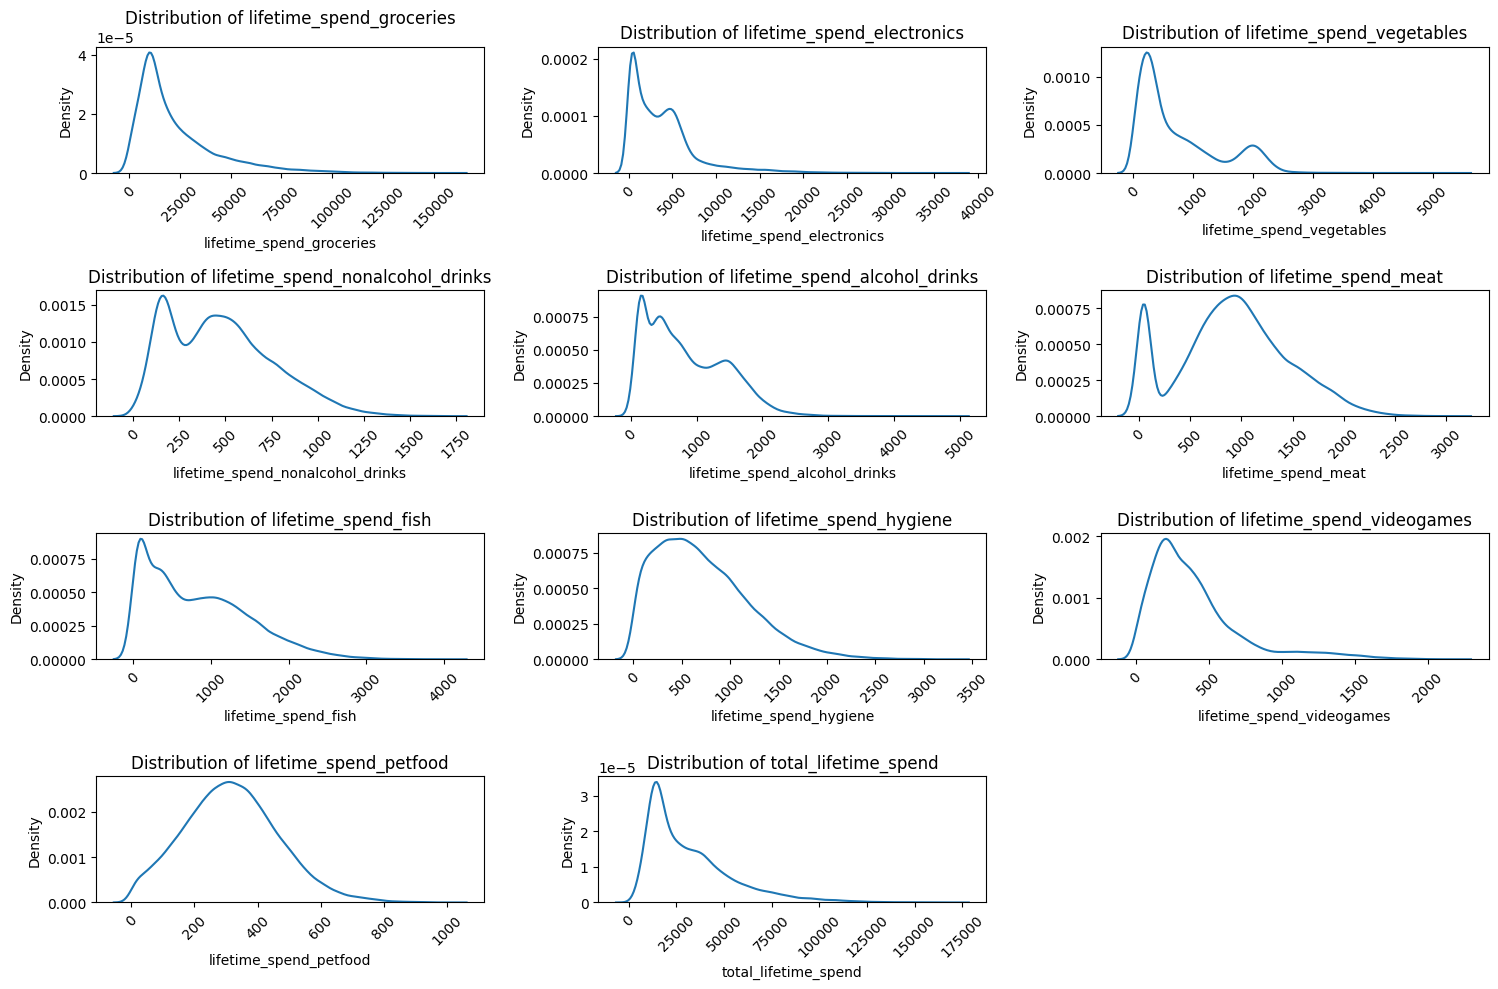

In [144]:
# Get columns with lifetime spend data
spend_columns = [col for col in info_df.columns if 'lifetime_spend' in col]  

# Create a grid of subplots
n_cols = 3  # Number of columns in the grid
n_rows = (len(spend_columns) + n_cols - 1) // n_cols  # Calculate the number of rows
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 10))  # Adjust figure size
axes = axes.flatten()  # Flatten the axes array for easy iteration

# Plot each column in a subplot
for i, col in enumerate(spend_columns):
    sns.kdeplot(data=info_df, x=col, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].tick_params(axis='x', rotation=45)

# Remove any unused subplots
for j in range(len(spend_columns), len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

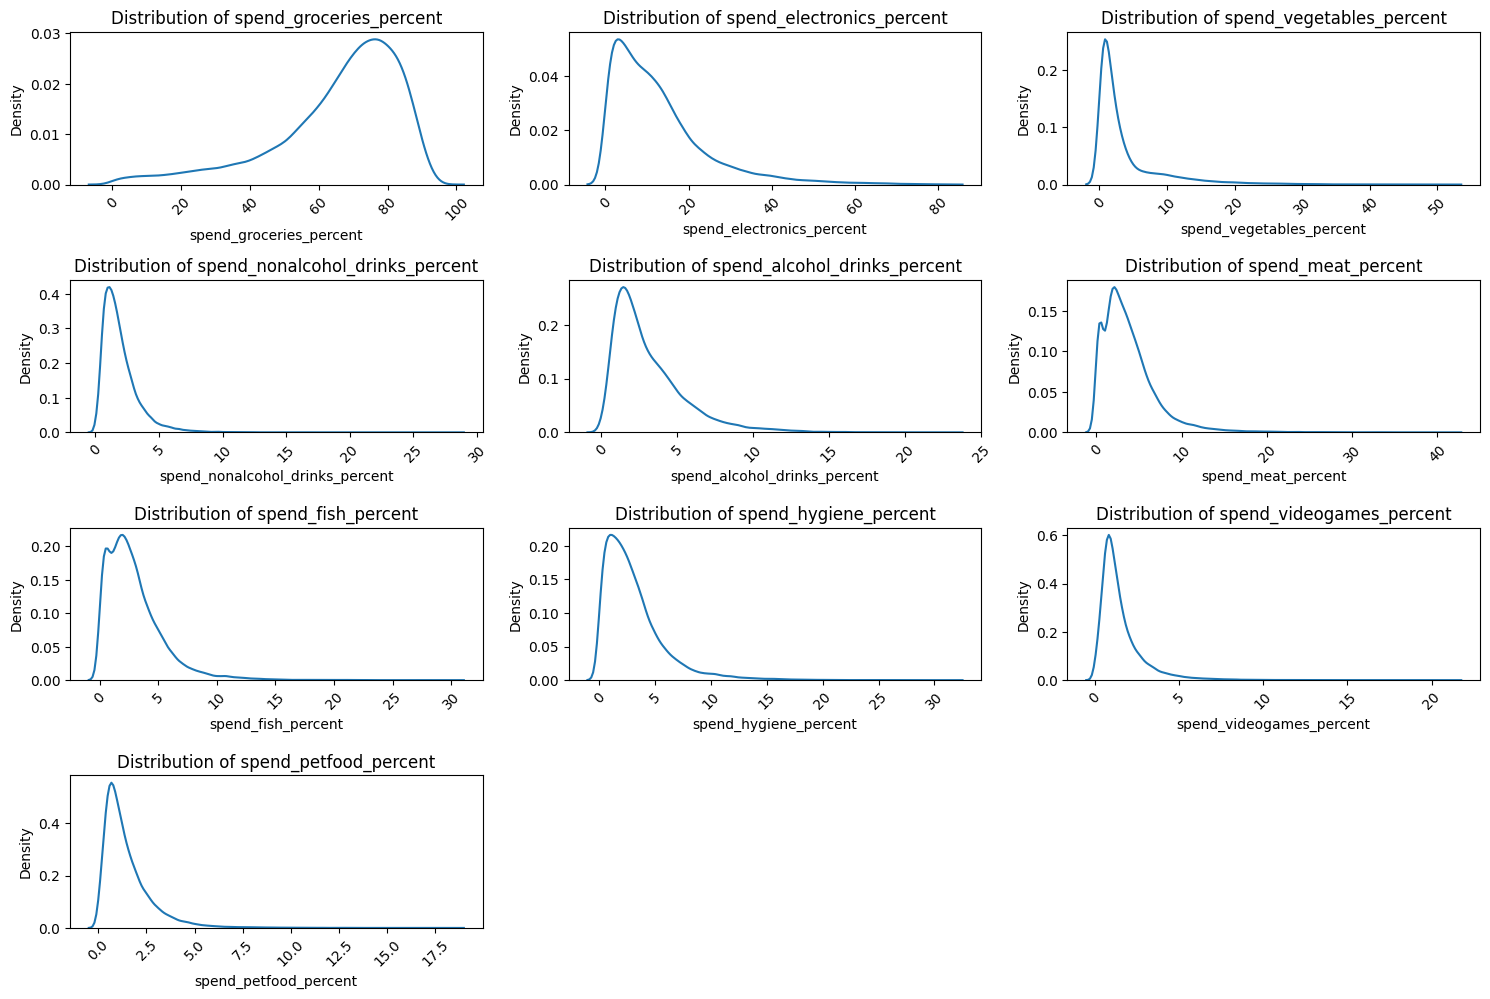

In [145]:
# Get columns with percent spend data for each category
spend_columns = [col for col in info_df.columns if '_percent' in col]

# Create a grid of subplots
n_cols = 3  # Number of columns in the grid
n_rows = (len(spend_columns) + n_cols - 1) // n_cols  # Calculate the number of rows
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 10))  # Adjust figure size
axes = axes.flatten()  # Flatten the axes array for easy iteration

# Plot each column in a subplot
for i, col in enumerate(spend_columns):
    sns.kdeplot(data=info_df, x=col, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].tick_params(axis='x', rotation=45)

# Remove any unused subplots
for j in range(len(spend_columns), len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

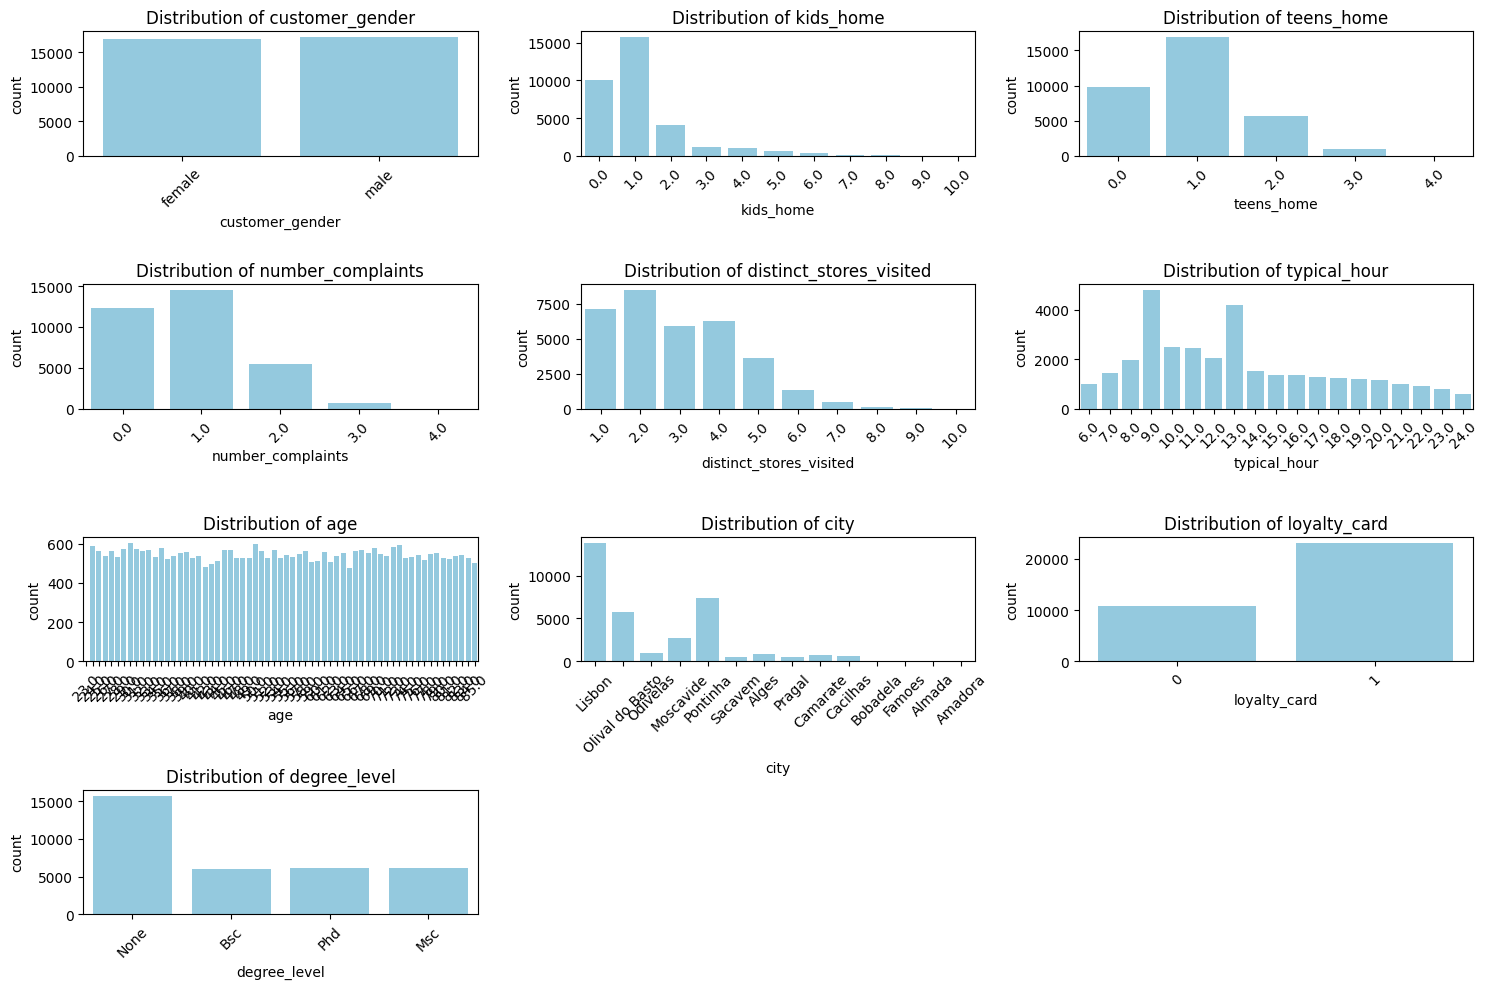

In [146]:
# Define the columns to plot
columns = ['customer_gender', 'kids_home', 'teens_home', 'number_complaints', 
           'distinct_stores_visited', 'typical_hour', 'age', 'city', 'loyalty_card', 'degree_level']

# Create a grid of subplots
n_cols = 3  # Number of columns in the grid
n_rows = (len(columns) + n_cols - 1) // n_cols  # Calculate the number of rows
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 10))  # Adjust figure size
axes = axes.flatten()  # Flatten the axes array for easy iteration

# Plot each column in a subplot
for i, col in enumerate(columns):
    sns.countplot(data=info_df, x=col, ax=axes[i], color='skyblue')
    axes[i].set_title(f'Distribution of {col}')
    axes[i].tick_params(axis='x', rotation=45)

# Remove any unused subplots
for j in range(len(columns), len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

In [147]:
# >>> everything below will be restructured and look better later <<<

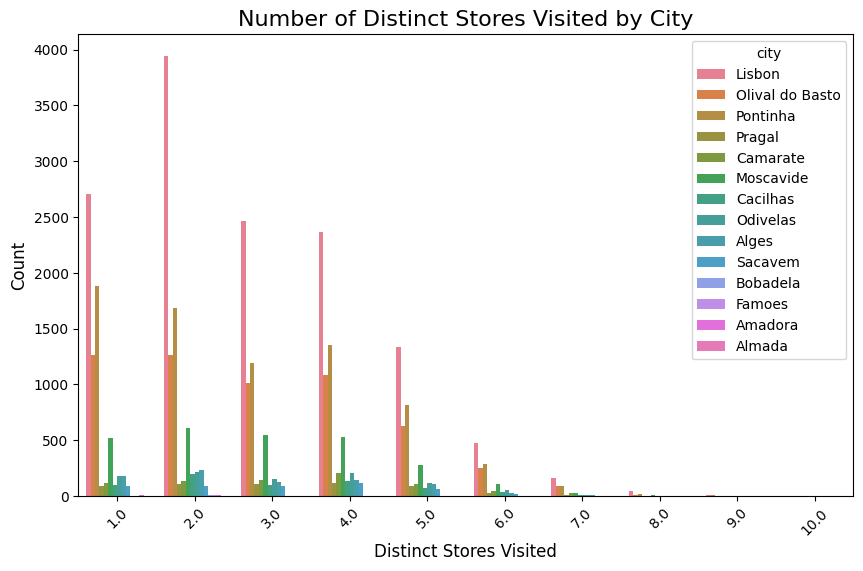

In [148]:
# Adjust the figure size
plt.figure(figsize=(10, 6))

# Create the count plot
sns.countplot(data=info_df, x='distinct_stores_visited', hue='city')#, palette='viridis')

# Add a title and labels
plt.title('Number of Distinct Stores Visited by City', fontsize=16)
plt.xlabel('Distinct Stores Visited', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Rotate x-axis labels if needed
plt.xticks(rotation=45)

# Show the plot
plt.show()

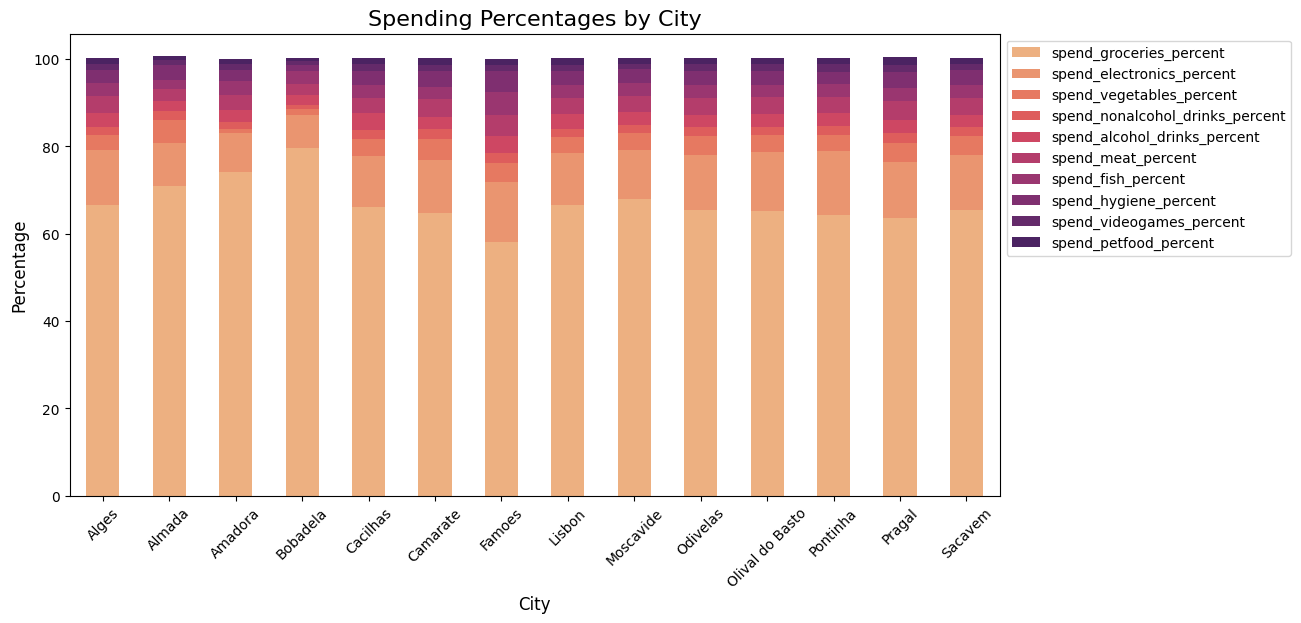

In [149]:
spending_percent_columns = [
    'spend_groceries_percent', 'spend_electronics_percent', 'spend_vegetables_percent',
    'spend_nonalcohol_drinks_percent', 'spend_alcohol_drinks_percent', 'spend_meat_percent',
    'spend_fish_percent', 'spend_hygiene_percent', 'spend_videogames_percent', 'spend_petfood_percent'
]
city_spending = info_df.groupby('city')[spending_percent_columns].mean()

city_spending.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='flare')
plt.title('Spending Percentages by City', fontsize=16)
plt.xlabel('City', fontsize=12)
plt.ylabel('Percentage', fontsize=12)
plt.xticks(rotation=45)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

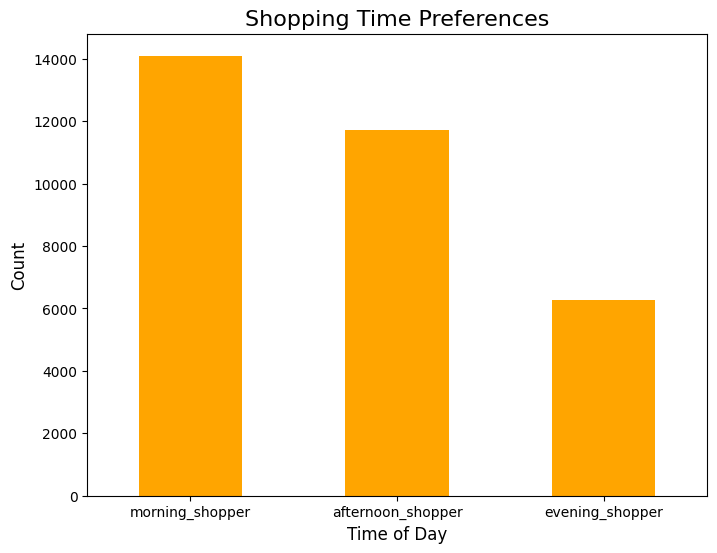

In [150]:
time_columns = ['morning_shopper', 'afternoon_shopper', 'evening_shopper']
time_preferences = info_df[time_columns].sum()

plt.figure(figsize=(8, 6))
time_preferences.plot(kind='bar', color='orange')
plt.title('Shopping Time Preferences', fontsize=16)
plt.xlabel('Time of Day', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=0)
plt.show()

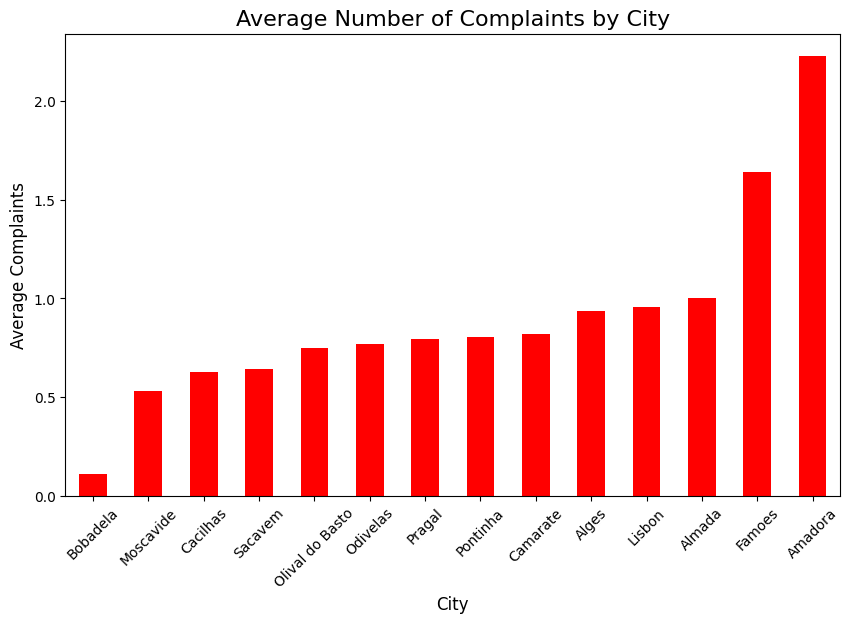

In [151]:
plt.figure(figsize=(10, 6))
info_df.groupby('city')['number_complaints'].mean().sort_values().plot(kind='bar', color='red')
plt.title('Average Number of Complaints by City', fontsize=16)
plt.xlabel('City', fontsize=12)
plt.ylabel('Average Complaints', fontsize=12)
plt.xticks(rotation=45)
plt.show()

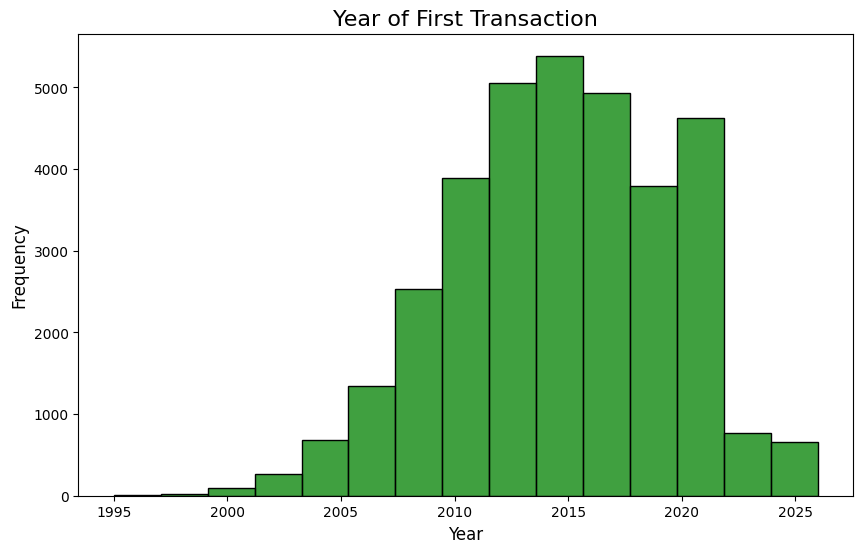

In [152]:
plt.figure(figsize=(10, 6))
sns.histplot(data=info_df, x='year_first_transaction', bins=15, kde=False, color='green')
plt.title('Year of First Transaction', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

In [153]:
info_df.columns

Index(['customer_id', 'customer_name', 'customer_gender', 'kids_home',
       'teens_home', 'number_complaints', 'distinct_stores_visited',
       'lifetime_spend_groceries', 'lifetime_spend_electronics',
       'typical_hour', 'lifetime_spend_vegetables',
       'lifetime_spend_nonalcohol_drinks', 'lifetime_spend_alcohol_drinks',
       'lifetime_spend_meat', 'lifetime_spend_fish', 'lifetime_spend_hygiene',
       'lifetime_spend_videogames', 'lifetime_spend_petfood',
       'lifetime_total_distinct_products',
       'percentage_of_products_bought_promotion', 'year_first_transaction',
       'age', 'morning_shopper', 'afternoon_shopper', 'evening_shopper',
       'city', 'total_lifetime_spend', 'spend_groceries_percent',
       'spend_electronics_percent', 'spend_vegetables_percent',
       'spend_nonalcohol_drinks_percent', 'spend_alcohol_drinks_percent',
       'spend_meat_percent', 'spend_fish_percent', 'spend_hygiene_percent',
       'spend_videogames_percent', 'spend_petfood_perc

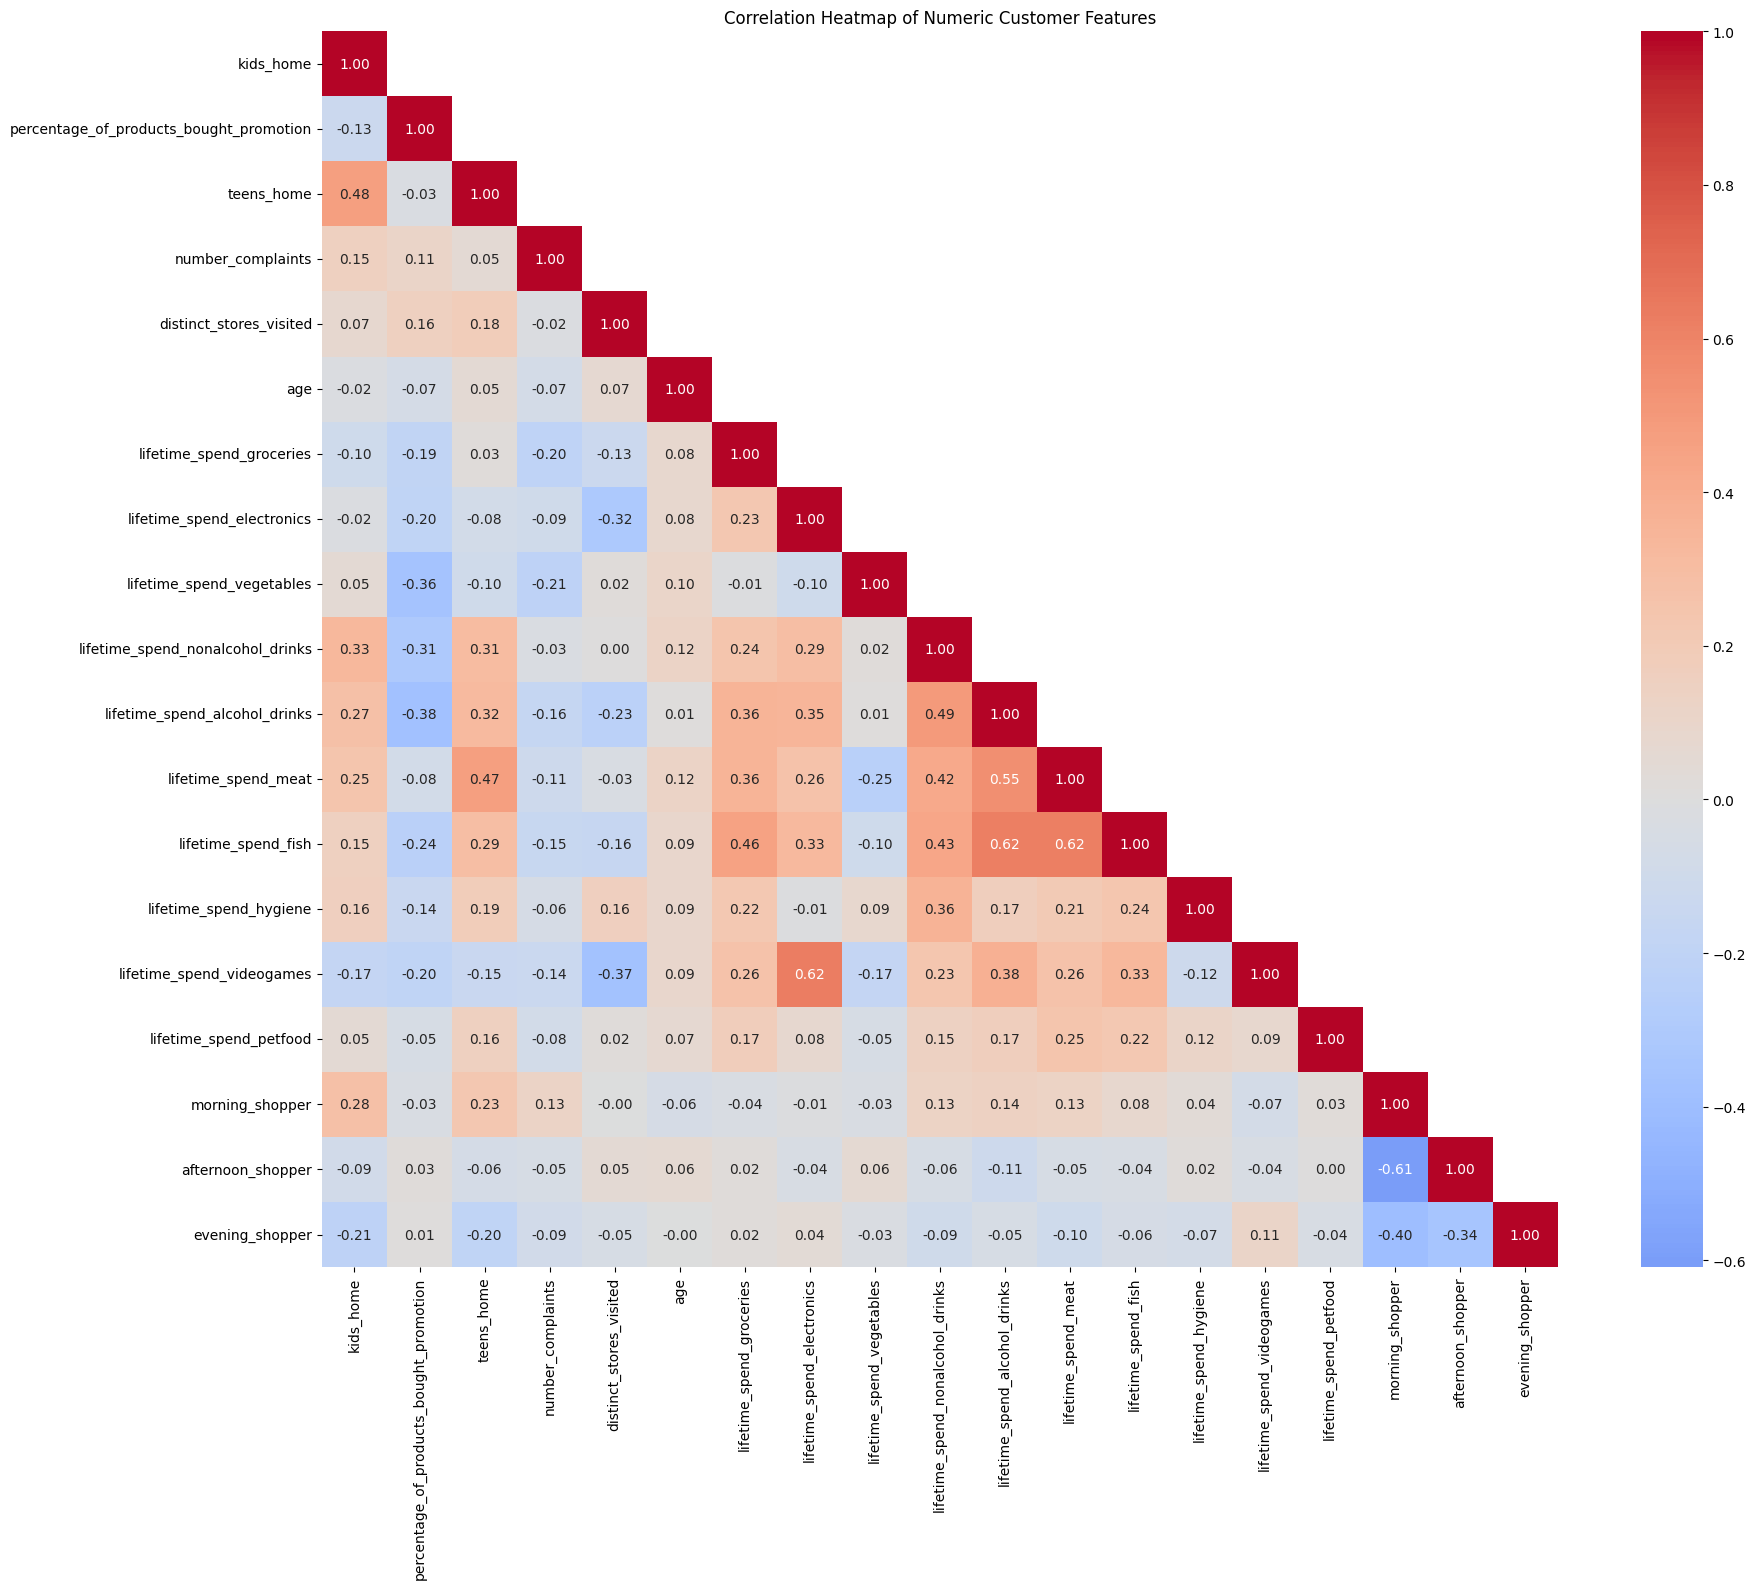

In [154]:
columns = ['kids_home', 'percentage_of_products_bought_promotion', 'teens_home', 'number_complaints', 
                   'distinct_stores_visited', 'age', 'lifetime_spend_groceries', 'lifetime_spend_electronics', 
                   'lifetime_spend_vegetables', 'lifetime_spend_nonalcohol_drinks', 'lifetime_spend_alcohol_drinks', 
                   'lifetime_spend_meat', 'lifetime_spend_fish', 'lifetime_spend_hygiene', 'lifetime_spend_videogames', 
                   'lifetime_spend_petfood', 'morning_shopper', 'afternoon_shopper', 'evening_shopper']

correlation_matrix = info_df[columns].corr()

# Create a mask to remove duplicate correlations but keep the diagonal
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool), k=1)

plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f', mask=mask, square=True)

plt.title('Correlation Heatmap of Numeric Customer Features')
plt.tight_layout()
plt.show()

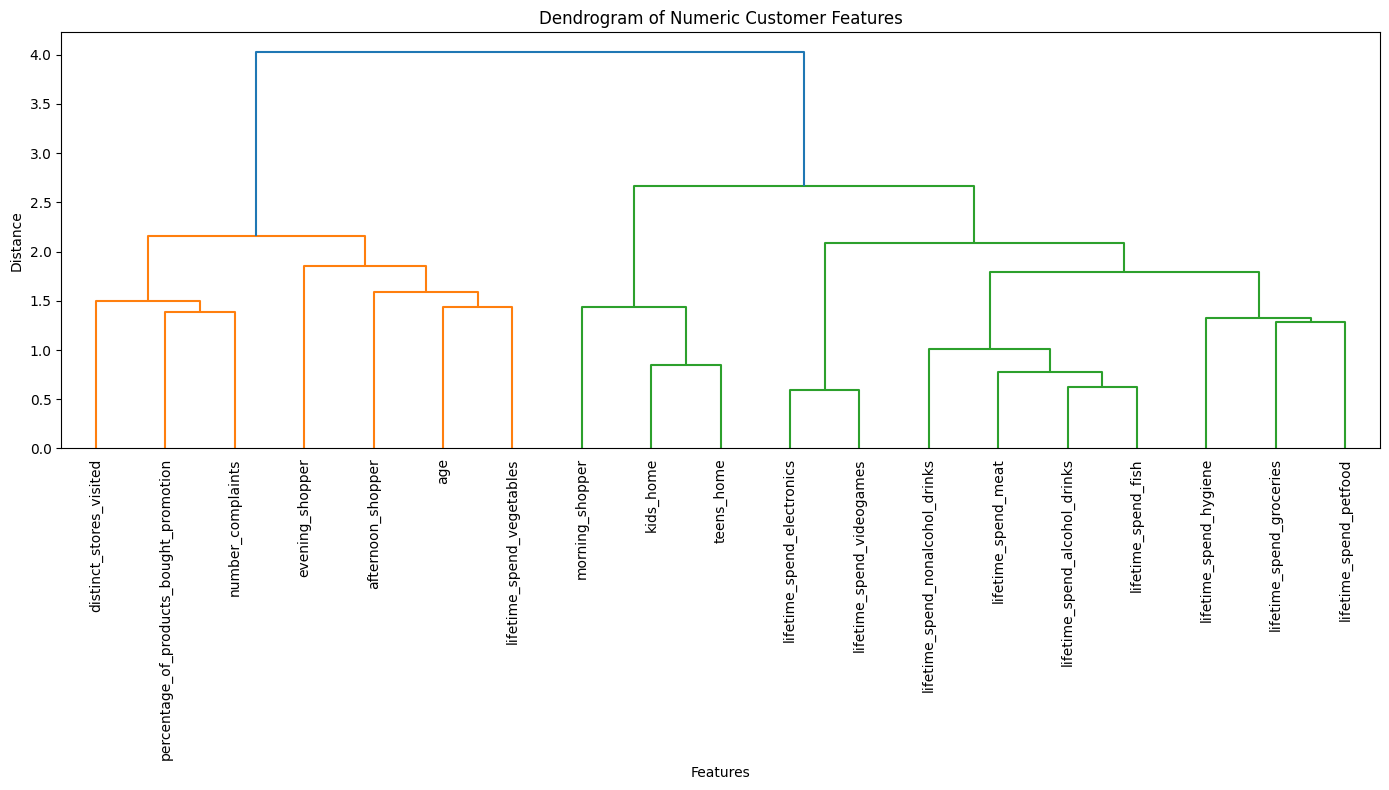

In [155]:
# Convert the correlation matrix to a distance matrix (1 - correlation)
distance_matrix = 1 - correlation_matrix

# Perform hierarchical clustering
linkage_matrix = sch.linkage(distance_matrix, method='ward')

# Plot the dendrogram
plt.figure(figsize=(14, 8))
dendrogram = sch.dendrogram(linkage_matrix, labels=columns, leaf_rotation=90, leaf_font_size=10)
plt.title('Dendrogram of Numeric Customer Features')
plt.xlabel('Features')
plt.ylabel('Distance')
plt.tight_layout()
plt.show()

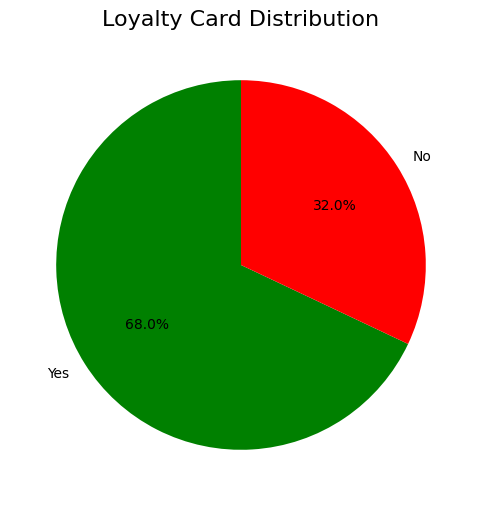

In [156]:
# Calculate the counts for each value of the loyalty card column
loyalty_counts = info_df['loyalty_card'].map({1: 'Yes', 0: 'No'}).value_counts()

# Plot the pie chart
plt.figure(figsize=(6, 6))
loyalty_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['green', 'red'])
plt.title('Loyalty Card Distribution', fontsize=16)
plt.ylabel('') 
plt.show()